# Practice Project - 6
_____________________________________
Advertising Sales Channel Prediction
__________________________________________
Problem Statement:

Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

# IMPORTING LIBRARIES:

In [1]:
#Importing required packages.

import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


#feature engineering

from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

#Let's check how the data is distributed
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# EDA 

In [3]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# no. of rows and coloumns
df.shape

(200, 5)

In [5]:
# check for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
# check the stats
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='sales', ylabel='Density'>

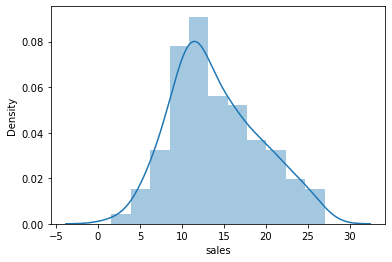

In [7]:
sns.distplot(df['sales'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

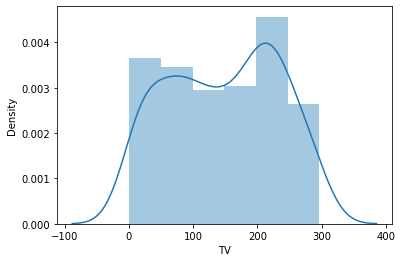

In [8]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

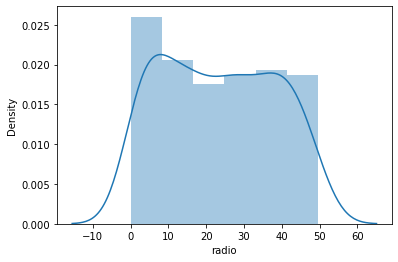

In [9]:

sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

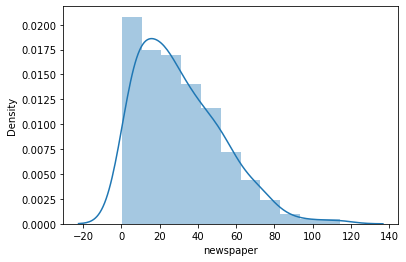

In [10]:
sns.distplot(df['newspaper'])

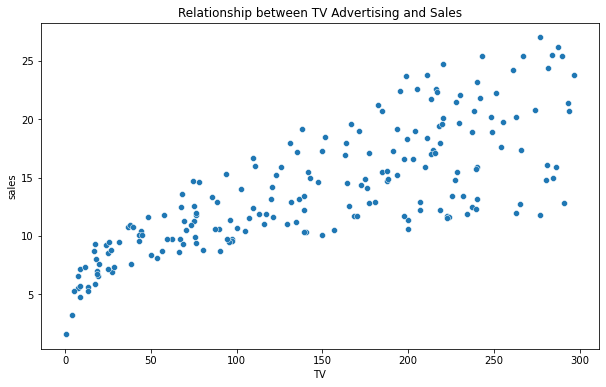

In [11]:
plt.figure(figsize=[10,6])
plt.title('Relationship between TV Advertising and Sales')
sns.scatterplot(df['TV'], df['sales']);

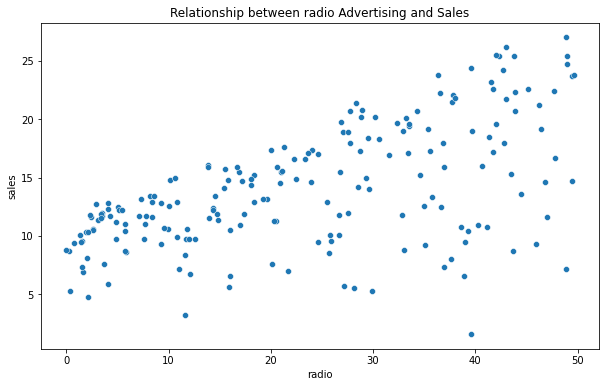

In [12]:
plt.figure(figsize=[10,6])
plt.title('Relationship between radio Advertising and Sales')
sns.scatterplot(df['radio'], df['sales']);

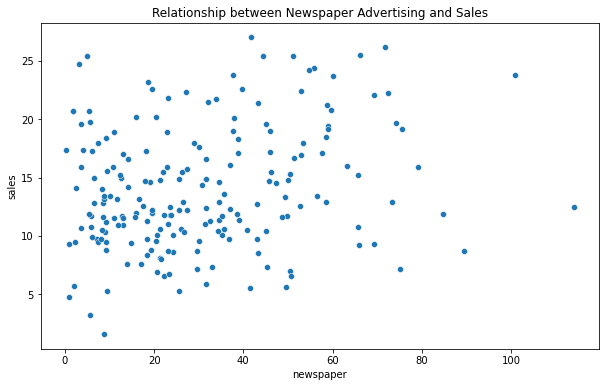

In [13]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Newspaper Advertising and Sales')
sns.scatterplot(df['newspaper'], df['sales']);

# CORRELATION

In [14]:
# corelation
corr_mat=df.corr()
corr_mat

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


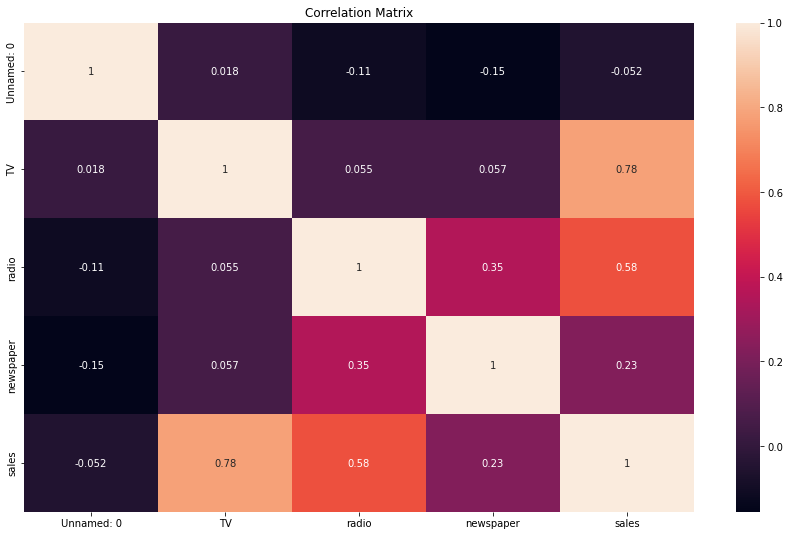

In [16]:
plt.figure(figsize=[15,9])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [17]:
corr_mat["sales"].sort_values(ascending=False)

sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64

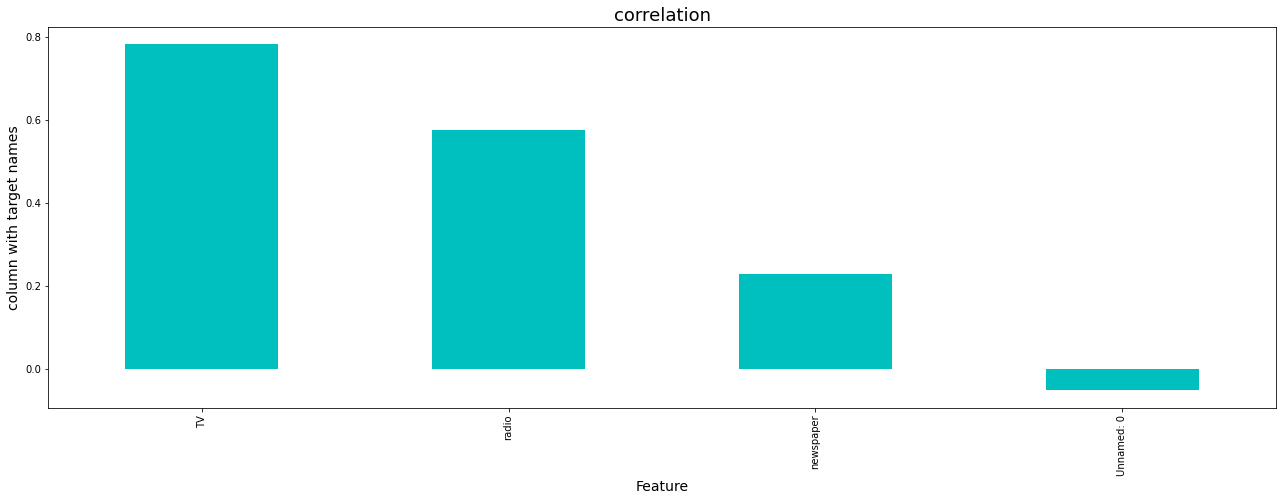

In [18]:
plt.figure(figsize=(22,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [19]:
x=df.drop("sales",axis=1)
y=df["sales"]

# skewness

In [20]:
x.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
dtype: float64

In [21]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)

df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [22]:
# Removing Skewness through Power Transforms
df_skew.skew()

Unnamed: 0   -0.268270
TV           -0.315199
radio        -0.242968
newspaper    -0.077942
dtype: float64

In [23]:
df=df_skew
x=df_skew

# outlier checking

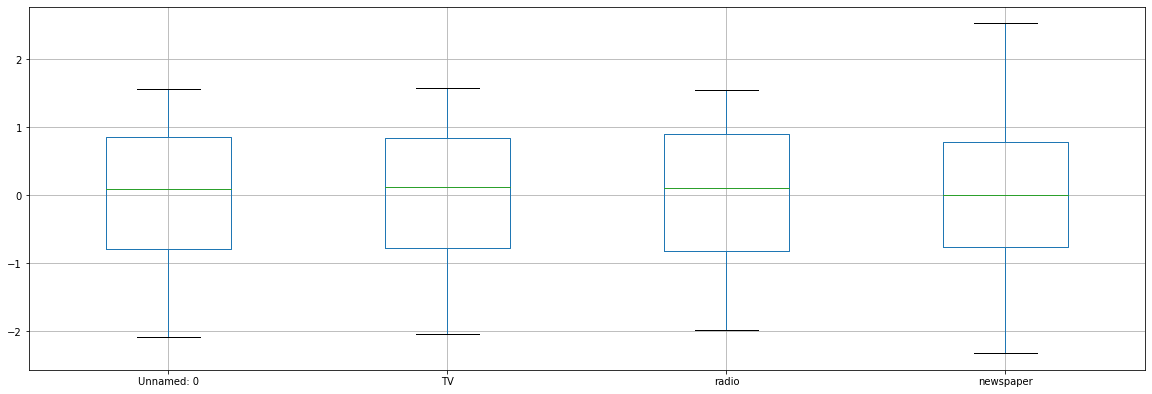

In [24]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

<AxesSubplot:>

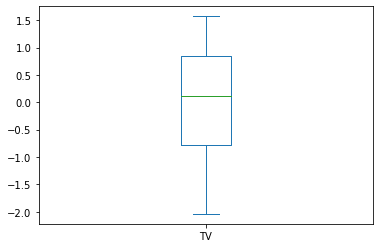

In [25]:
df['TV'].plot.box()

<AxesSubplot:>

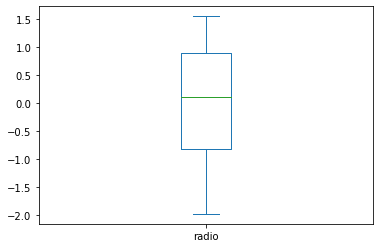

In [26]:
df['radio'].plot.box()

<AxesSubplot:>

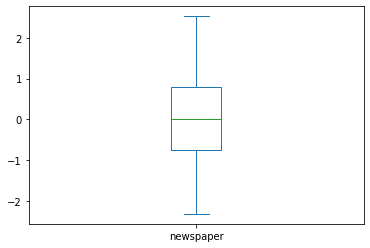

In [27]:
df['newspaper'].plot.box()

In [28]:
# Scaling the Feature data

from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)
x

array([[-2.07937596,  0.94867429,  0.96224689,  1.51433531],
       [-2.03292263, -1.19131426,  1.0401788 ,  0.78768252],
       [-1.990711  , -1.6477566 ,  1.37070964,  1.51699753],
       [-1.95139683,  0.14102023,  1.14238689,  1.21465643],
       [-1.91424742,  0.45271493, -0.74865064,  1.21170398],
       [-1.87880665, -1.82382233,  1.51501853,  1.66502354],
       [-1.8447658 , -1.00249116,  0.69372704, -0.1077535 ],
       [-1.81190337, -0.210275  , -0.10158544, -0.84409341],
       [-1.7800535 , -1.82609501, -1.63345378, -2.13259669],
       [-1.74908785,  0.64764492, -1.56676988, -0.22900395],
       [-1.71890445, -0.88377378, -1.20298758, -0.07226156],
       [-1.68942058,  0.79708355,  0.18072579, -1.60261898],
       [-1.66056789, -1.52641627,  0.81900563,  1.42512925],
       [-1.63228912, -0.48036844, -1.02813642, -1.22982506],
       [-1.60453563,  0.69106577,  0.6992403 ,  0.81860579],
       [-1.57726567,  0.60295713,  1.45770359,  1.04432344],
       [-1.55044308, -0.

# splitting the dataset

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=100)

In [30]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(r2_score(y_test,predlr))
print(mean_squared_error(y_test,predlr))
print(np.sqrt(mean_squared_error(y_test,predlr)))

0.9257857600065251
1.5771226395503344
1.2558354348999452


In [31]:
scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for Linear Regression Model is ',scr.mean())

Cross validation score for Linear Regression Model is  0.8953473674194841


In [37]:
r = Ridge()
r.fit(x_train,y_train)
predr = r.predict(x_test)
print(r2_score(y_test,predr))
print(mean_squared_error(y_test,predr))
print(np.sqrt(mean_squared_error(y_test,predl)))

0.9248076816915091
1.5979077268058355
1.9085931068779716


In [35]:
scr = cross_val_score(r,x,y,cv=5)
print('Cross validation score for Ridge Regression Model is', scr.mean())

Cross validation score for Ridge Regression Model is 0.8953866482738437


In [36]:

l = Lasso()
l.fit(x_train,y_train)
predl = l.predict(x_test)
print(r2_score(y_test,predl))
print(mean_squared_error(y_test,predl))
print(np.sqrt(mean_squared_error(y_test,predl)))

0.82858513530148
3.642727647622108
1.9085931068779716


In [38]:
scr = cross_val_score(l,x,y,cv=5)
print('Cross validation score for Lasso Regression Model is ', scr.mean())

Cross validation score for Lasso Regression Model is  0.8270960357806553


In [39]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

0.9835209353937516
0.35019567500000076
0.5917733307610278


In [40]:
scr = cross_val_score(rf,x,y,cv=5)
print('Cross validation score for Random Forest Regressor Model is', scr.mean())

Cross validation score for Random Forest Regressor Model is 0.9730572516621242


#  HYPER PARAMETER TUNING

In [1]:
parameters1 = {'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
             'random_state': [200, 700, 900],
             'max_iter': [200, 900],
             'selection': ['cyclic','random']}
GCV=GridSearchCV(Lasso(),parameters1,cv=5)
GCV.fit(x_train,y_train)

NameError: name 'GridSearchCV' is not defined

In [42]:
GCV.best_params_

{'alpha': 4.0, 'max_iter': 200, 'random_state': 200, 'selection': 'cyclic'}

In [43]:
mod1=Lasso(alpha=4.0,random_state=200,selection='cyclic',max_iter=200)

mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
print(r2_score(y_test,predrf)*100)
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

98.35209353937516
0.35019567500000076
0.5917733307610278


# Saving the model:

In [44]:
import joblib
joblib.dump(mod1,"Advertising_Sales_Lasso.pkl")

['Advertising_Sales_Lasso.pkl']